## Задание 
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. 
Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. 
На основе выбранного набора данных студент должен построить модели машинного обучения для решения 
или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных.
Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков.
Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения
моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. 
Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.
Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров.
Рекомендуется использовать методы кросс-валидации. 
В зависимости от используемой библиотеки можно применять функцию GridSearchCV,
использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. 
Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.


In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('Data/HW/car_ad.csv', sep=',', encoding='latin-1')
data2 = pd.read_csv('Data/HW/car_ad.csv', sep=',', encoding='latin-1')
data.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


### 2. Проведение разведочного анализа данных. 

In [2]:
data.shape

(9576, 10)

In [3]:
data.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [4]:
# Проверка на пустые значения
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

### Удаление строк с пропусками в данных.

In [5]:
#Пустые значения составляют примерно 5 процентов, поэтому не будем их удалять 
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((9576, 10), (8739, 10))

### Построение графиков, необходимых для понимания структуры данных.

In [6]:
#основные статические характеритсики набора данных
data_new.describe()

,price,mileage,engV,year
count,8739.000000,8739.000000,8739.000000,8739.000000
mean,15733.542261,140.095434,2.588607,2006.609681
std,24252.904810,97.892213,5.416670,6.968947
min,0.000000,0.000000,0.100000,1959.000000
25%,5000.000000,71.000000,1.600000,2004.000000
50%,9250.000000,130.000000,2.000000,2008.000000
75%,16800.000000,195.500000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [7]:
# Определим уникальные значения для целевого признака "тип кузова"
data_new['body'].unique()

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

In [8]:
# Определим уникальные значения для целевого признака "Марка автомобиля"
data_new['car'].unique()

array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'Land Rover', 'Volkswagen', 'Audi', 'Chrysler', 'Jaguar',
       'Mitsubishi', 'Kia', 'Porsche', 'Toyota', 'Hyundai', 'Opel',
       'Chevrolet', 'Skoda', 'Daewoo', 'Mazda', 'Lexus', 'Infiniti',
       'Subaru', 'VAZ', 'Alfa Romeo', 'Smart', 'Peugeot', 'Suzuki',
       'Chery', 'Bentley', 'Volvo', 'ZAZ', 'Citroen', 'Dodge', 'Fiat',
       'Jeep', 'SsangYong', 'Seat', 'MINI', 'Dacia', 'Hummer', 'Geely',
       'Maserati', 'BYD', 'Cadillac', 'Acura', 'Aston Martin', 'Tesla',
       'Rover', 'GAZ', 'GMC', 'Lincoln', 'ËUAZ', 'Moskvich-AZLK', 'FAW',
       'UAZ', 'Rolls-Royce', 'TATA', 'ZX', 'Lifan', 'Mercury', 'Groz',
       'Great Wall', 'Moskvich-Izh', 'Saab', 'Lancia', 'Aro', 'Ferrari',
       'Bogdan', 'Dadi', 'MG', 'Samand', 'JAC', 'Samsung', 'Lamborghini',
       'Daihatsu', 'Hafei', 'SMA', 'Isuzu', 'Huanghai', 'Wartburg',
       'Buick'], dtype=object)

In [9]:
# Определим уникальные значения для целевого признака "Тип привода"
data_new['drive'].unique()

array(['full', 'rear', 'front'], dtype=object)

In [10]:
data_new['engV'].unique()

array([ 2.5 ,  1.8 ,  5.5 ,  2.  ,  1.5 ,  2.2 ,  1.2 ,  4.8 ,  5.  ,
        3.  ,  4.4 ,  1.6 ,  2.98,  2.4 ,  2.8 ,  3.5 ,  2.99,  1.9 ,
        1.7 ,  4.5 ,  3.6 ,  1.4 ,  2.7 ,  4.  ,  3.8 ,  5.7 , 99.99,
        3.2 ,  3.7 ,  4.7 ,  1.  ,  4.6 ,  0.11,  4.2 ,  0.8 ,  2.3 ,
        1.3 ,  6.  ,  2.6 ,  0.6 ,  1.25,  5.46,  6.3 ,  5.6 ,  8.3 ,
        3.3 ,  1.1 ,  6.1 ,  0.65,  1.78,  2.1 ,  3.4 ,  7.  ,  5.2 ,
       75.  ,  6.5 ,  1.23,  8.  ,  6.2 ,  2.9 ,  1.34,  0.7 ,  1.39,
       90.  ,  5.3 ,  4.67, 20.  , 14.  , 11.5 ,  1.45,  9.  , 10.  ,
        4.66, 15.  ,  0.9 , 12.  ,  2.57,  1.91,  1.33,  2.49,  1.12,
        1.36,  2.14, 55.  ,  4.39,  6.75,  1.59, 28.  ,  8.7 ,  3.1 ,
        2.15, 30.  ,  4.3 ,  7.2 ,  5.4 , 66.  , 19.  ,  1.24, 18.  ,
       22.  , 70.  ,  2.44,  1.35,  2.17,  2.46,  2.28,  1.79,  0.14,
        1.31,  0.1 , 74.  ])

In [11]:
# Определим уникальные значения для целевого признака "Тип двигателя"
data_new['engType'].unique()

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

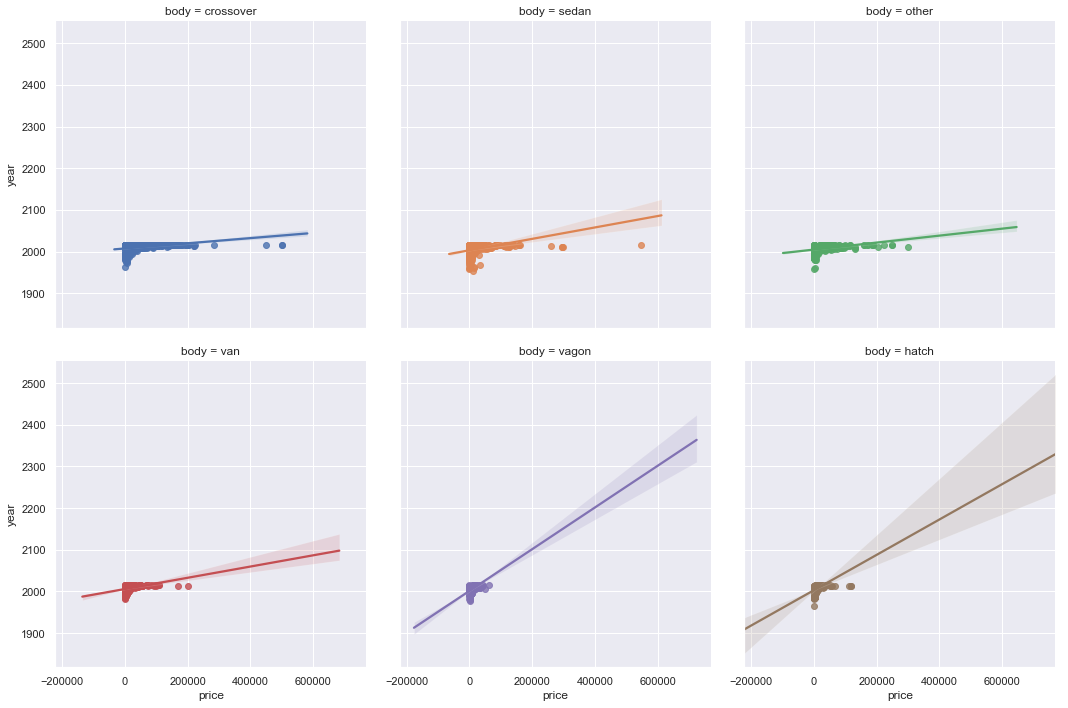

In [13]:
import seaborn as sns; sns.set(color_codes=True)
g = sns.lmplot(x="price", y="year", col="body", hue="body",
                data=data2, col_wrap=3, height=5)


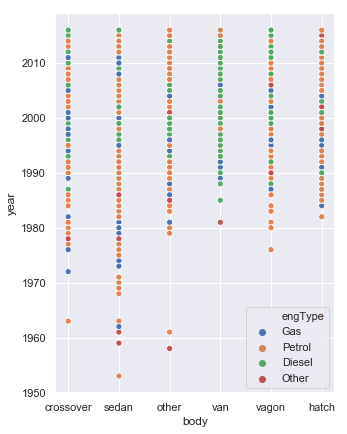

In [14]:
fig, ax = plt.subplots(figsize=(5,7)) 
sb.scatterplot(ax=ax, x='body', y='year', data=data2, hue='engType')

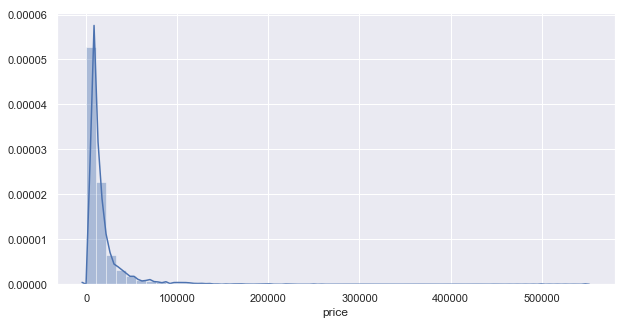

In [15]:
fig, ax = plt.subplots(figsize=(10,5)) 
sb.distplot(data_new['price'])

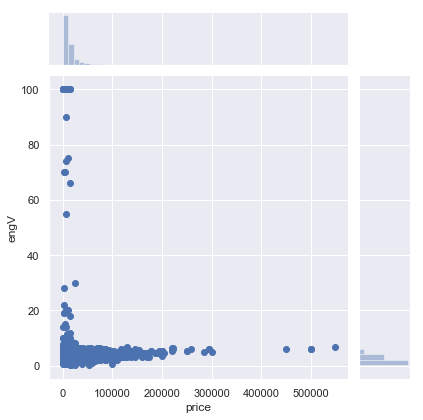

In [16]:
sb.jointplot(x='price', y='engV', data=data_new)

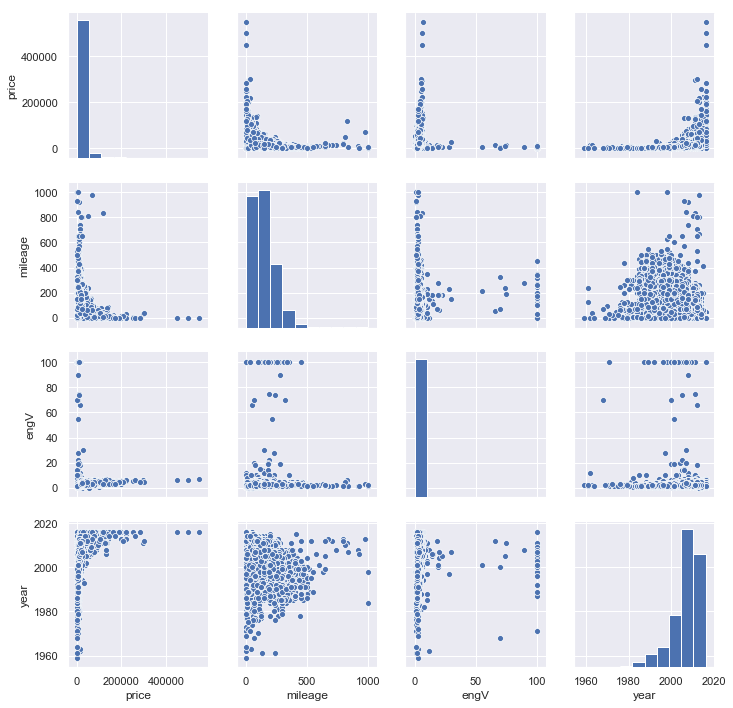

In [17]:
# Больше всего автомобилей до 10 тысяч с объемом двигателя меньше 10 литров
sb.pairplot(data_new)

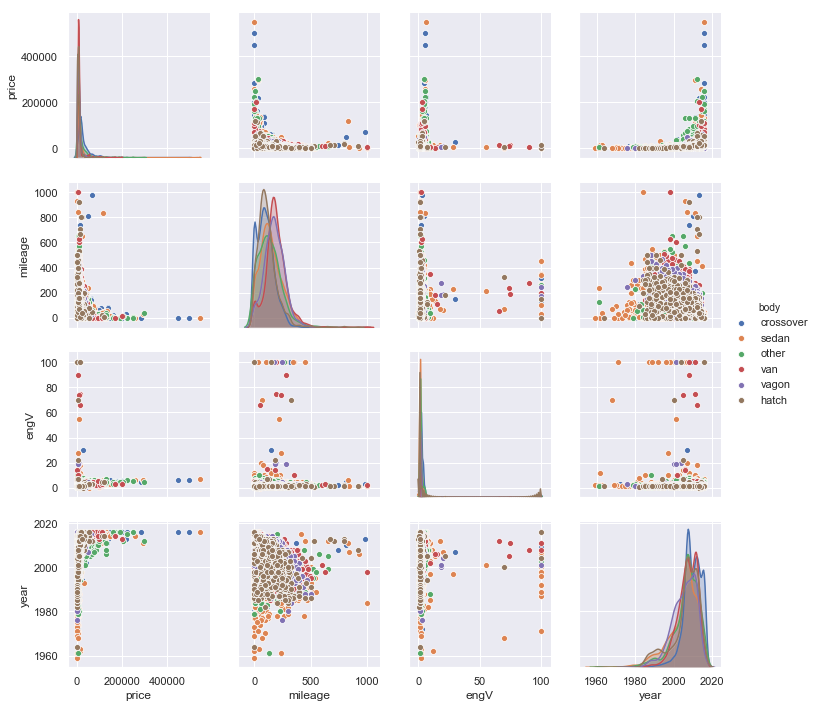

In [18]:
sb.pairplot(data_new, hue="body")

In [19]:
#  Среди автомобилей преобладают хэтчбэки

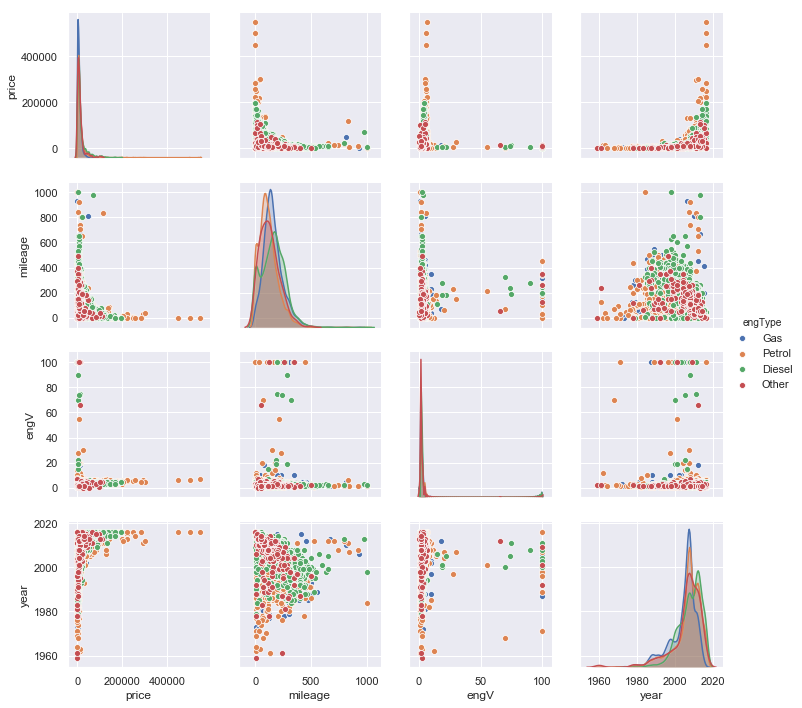

In [20]:
sb.pairplot(data_new, hue="engType")

In [21]:
# Видно, что сейчас преимущественно используются в качестве топлива- бензин и дизель, газ использкется очень редко.

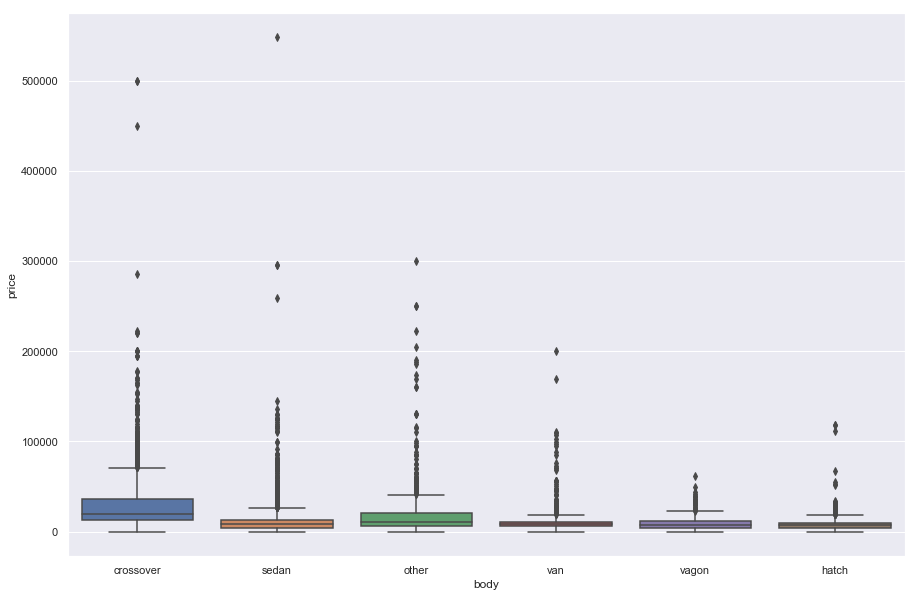

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sb.boxplot(x='body', y='price',data=data_new)

In [23]:
data.corr()

,price,mileage,engV,year
price,1.000000,-0.312415,0.051070,0.370379
mileage,-0.312415,1.000000,0.047070,-0.495599
engV,0.051070,0.047070,1.000000,-0.042251
year,0.370379,-0.495599,-0.042251,1.000000


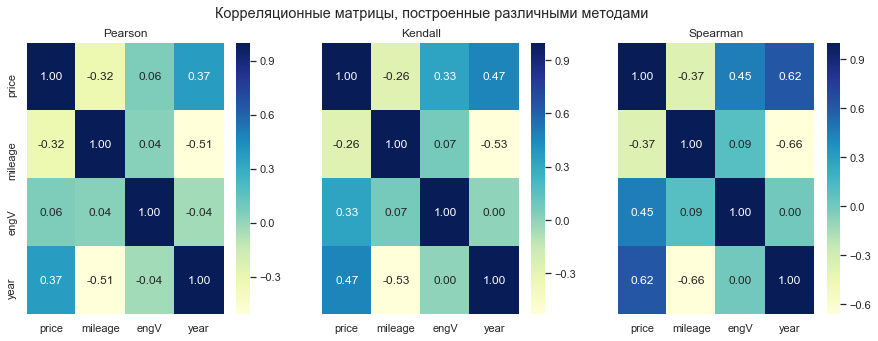

In [24]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sb.heatmap(data_new.corr(method='pearson'), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sb.heatmap(data_new.corr(method='kendall'), ax=ax[1],cmap='YlGnBu', annot=True, fmt='.2f')
sb.heatmap(data_new.corr(method='spearman'), ax=ax[2], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### 3. Выбор признаков, подходящих для построения моделей. 
### Кодирование категориальных признаков. 

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
data_new.head(4)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front


In [27]:
import warnings
warnings.filterwarnings('ignore')
# Кодирование категориального признака(кузов автомобиля(body), тип двигателя (engType), регистрация (registration),
#тип привода (drive) , производитель (car), модель (model)) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_new.body)
data_new['body'] = le.transform(data_new.body)
le.fit(data_new.engType)
data_new['engType'] = le.transform(data_new.engType)
le.fit(data_new.registration)
data_new['registration'] = le.transform(data_new.registration)
le.fit(data_new.drive)
data_new['drive'] = le.transform(data_new.drive)
le.fit(data_new.car)
data_new['car'] = le.transform(data_new.car)
le.fit(data_new.model)
data_new['model'] = le.transform(data_new.model)
data_new.head(4)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,23,15500.0,0,68,2.5,1,1,2010,473,1
1,50,20500.0,3,173,1.8,1,1,2011,321,2
2,50,35000.0,2,135,5.5,3,1,2008,231,2
3,50,17800.0,5,162,1.8,0,1,2012,199,0


### Корреляционная матрица

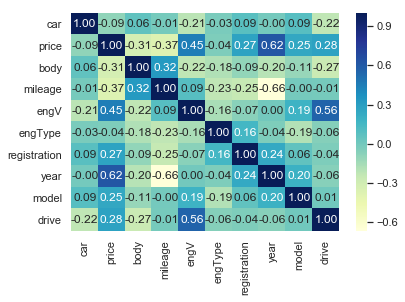

In [28]:
sb.heatmap(data_new.corr(method='spearman'), cmap='YlGnBu', annot=True, fmt='.2f')

Лучше всего видно, какие признаки больше всего влияют на стоимость автомобиля. 
Цена коррелирует больше всего с  объемом двигателя, годом производства, 
чуть меньше с типом привода автомобиля и моделью.
Также есть отрицательная корреляция, то есть при возрастании одной величины значение другой убывает.
Например, при увеличении пробега цена падает. В зависимости от типа кузова цена тоже может быть ниже.
Также на стоимость влияет название производителя и вид топливаТ, используемый автомобилем.


### Масштабирование данных. 

In [29]:
# Термины "масштабирование" и "нормализация" часто используются как синонимы. 
# Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.
from sklearn.preprocessing import StandardScaler
    # 3.1. MinMax масштабирование
data_new.shape

(8739, 10)

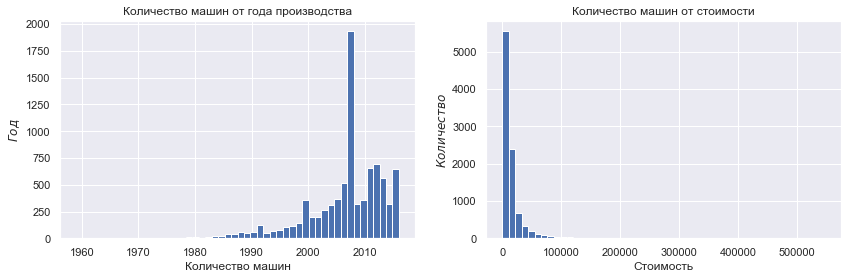

In [30]:
sc2 = StandardScaler()
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 4)
)
sc2_data= sc2.fit_transform(data_new[['year']])
ax1.hist(data_new['year'], 50)
ax1.set_title('Количество машин от года производства')
ax1.set_xlabel('Количество машин')
ax1.set_ylabel('$Год$')
sc2_data = sc2.fit_transform(data2[['price']])
ax2.hist(data2['price'], 50)
ax2.set_title('Количество машин от стоимости')
ax2.set_xlabel('Стоимость')
ax2.set_ylabel('$Количество$')
plt.show()

In [31]:
# Вывод: больше всего авто 2007 года выпуска, среднее количество -2011,12,15
# Стоимость до 10 000, реже до 20 -30 тысяч

### Удаление лишних данных

In [32]:
data.head(1)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full


In [33]:
data_new.head(1)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,23,15500.0,0,68,2.5,1,1,2010,473,1


In [34]:
data_clean = data_new

In [35]:
data_clean = data_new.drop('registration', axis=1)
data_clean = data_clean.drop('model', axis=1)
data_clean = data_clean.drop('car', axis=1)
data_clean = data_clean.drop('engType', axis=1)
data_clean = data_clean.drop('year', axis=1)
data_clean = data_clean.drop('mileage', axis=1)
data_clean = data_clean.drop('body', axis=1)

In [36]:
data_clean.head(1)

,price,engV,drive
0,15500.0,2.5,1


In [37]:
data_clean.corr()

,price,engV,drive
price,1.000000,0.062118,0.212639
engV,0.062118,1.000000,0.083160
drive,0.212639,0.083160,1.000000


## 5 Выбор метрик
https://habr.com/ru/company/ods/blog/328372/

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества.Будем использывать F-мера — среднее гармоническое precision и recall.
Выбранные метрики:
1. Precision
2. recall 
3. F-мера

### 6. Выбор моделей для задачи классификации
1. SGDClassifier - стохастический градиентный спуск.
2. DecisionTreeClassifier - дерево решений.
3. RandomForestClassifier - случайный лес.

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 7. Формирование обучающей и тестовой выборок

In [39]:
target = data_clean['drive']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_clean, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [41]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6991, 3), (6991,), (1748, 3), (1748,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров
Стохастический градиентный спуск

In [42]:
sgd = SGDClassifier().fit(X_train, Y_train)
predicted_sgd = sgd.predict(X_test)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [44]:
def print_metrics(Y_test, predicted_value): 
    print("precision_score {}".format(
      precision_score(Y_test, predicted_sgd, average='weighted')))
    print("recall_score {}".format(
      recall_score(Y_test, predicted_sgd, average='weighted')))
    print("f1_score {}".format(
      f1_score(Y_test, predicted_sgd, average='weighted')))

In [45]:
print_metrics(Y_test, predicted_sgd)

precision_score 0.27533018936236575
recall_score 0.2528604118993135
f1_score 0.11942004173740252


Дерево решений

In [46]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)
print_metrics(Y_test, predicted_dt)

precision_score 0.27533018936236575
recall_score 0.2528604118993135
f1_score 0.11942004173740252


Случайный лес

In [47]:
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)
print_metrics(Y_test, predicted_rfc)

precision_score 0.27533018936236575
recall_score 0.2528604118993135
f1_score 0.11942004173740252


ВЫВОД: Для данного датасета невозможно нормально обучить модель для классификации, поэтому возьмем новый датасет

https://www.kaggle.com/iabhishekofficial/mobile-price-classification/downloads/mobile-price-classification.zip/1

## Колонки датасета
    
1. battery_power- общая энергия, которую аккумулятор может хранить в mAh
2. blueHas - наличие bluetooth
3. clock_speed - тактовая частота, с которой микропроцессор выполняет инструкции
4. dual_sim - поддержка 2 сим-карт
5. fcFront Camera mega pixels - камера, мегапиксели
6. four_gHas 4G or not - наличие 4G
7. int_memoryInternal Memory in Gigabytes - внутренняя память
8. m_dep - толщина телефона в см
9. mobile_wt - вес телефона, г
10. n_cores- Количество ядер процессора
11. pc - Основная камера, мегапиксели
12. px_height- Пиксельное разрешение (высота)
13. px_width- Пиксельное разрешение(ширина)
14. ram- Оперативная память в мегабайтах
15. sc_h- Высота экрана мобильного в см
16. sc_w- Ширина экрана мобильного в см
17. talk_time - Максимальное время заряда аккумулятора
18. three_g - поддержка 3G
19. touch_screen- наличие сенсорного экрана
20. wifi- наличие wifi 
21. price_range - это целевая переменная со значениями 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [48]:
phone = pd.read_csv('Data/HW/phones.csv', sep=',', encoding='latin-1')
phone.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0


In [49]:
phone.shape

(3000, 21)

In [50]:
phone.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

In [51]:
# Проверка на пустые значения
phone.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

In [52]:
#Пустые значения составляют примерно 5 процентов, поэтому не будем их удалять 
# Удаление строк, содержащих пустые значения
phone_new = phone.dropna(axis=0, how='any')
(phone_new.shape)

(2000, 21)

In [53]:
phone_new= phone

###  Корреляционная матрица

Text(0.5, 1.0, 'Корреляционная матрица ')

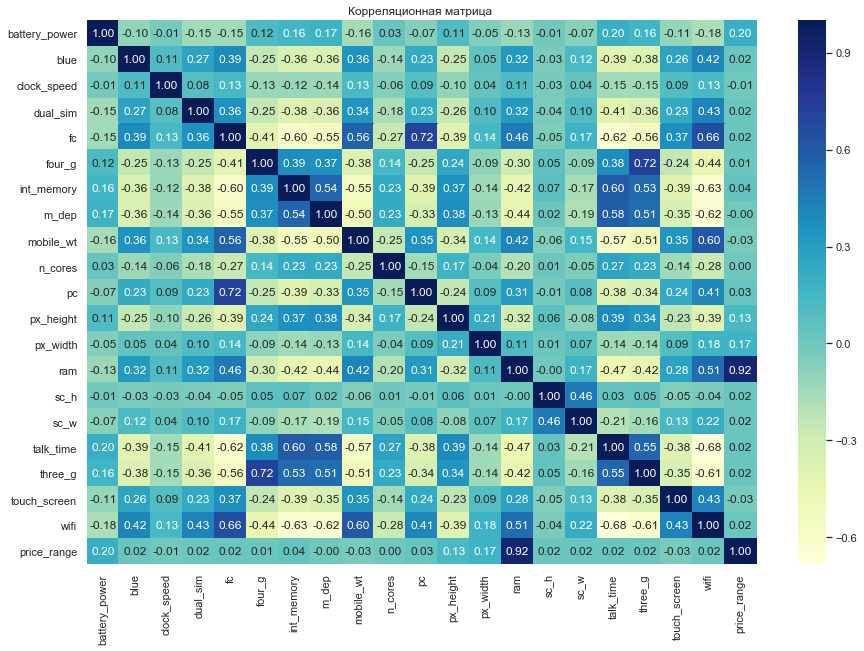

In [54]:
corr=phone.corr(method='spearman')
fig = plt.figure(figsize=(15,10))
r = sb.heatmap(corr, cmap='YlGnBu', annot=True,fmt='.2f')
r.set_title("Корреляционная матрица ")

На стоимость больше всего влияет объем ram -памяти, объем батареи и размер дисплея.

### Графики 

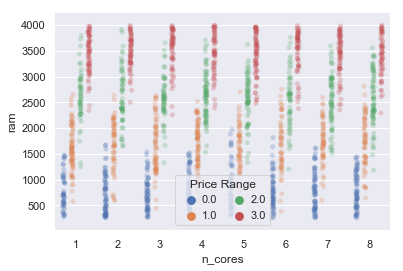

In [55]:
f, ax = plt.subplots()
sb.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sb.stripplot(x="n_cores", y="ram", hue="price_range",
              data=phone, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

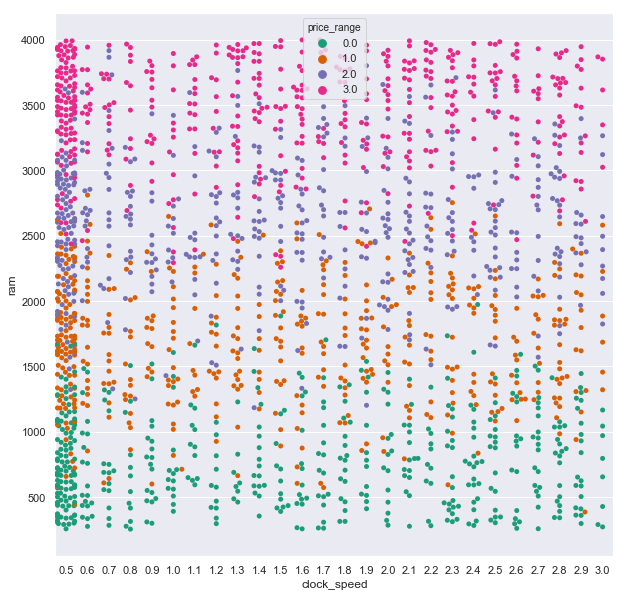

In [56]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sb.swarmplot(x="clock_speed", y="ram", hue="price_range",
              palette="Dark2", data=phone)
ax=sb.set(style="darkgrid")

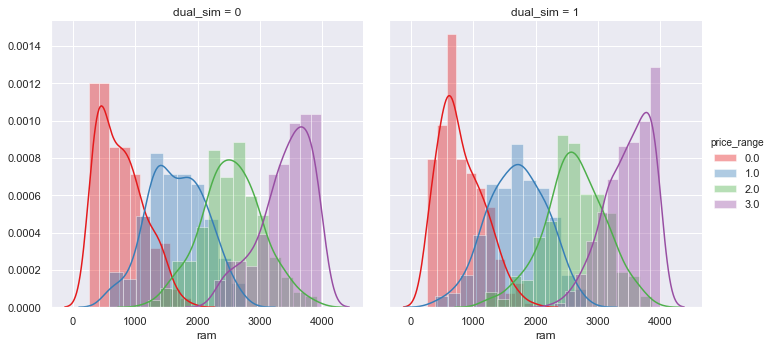

In [57]:
g = sb.FacetGrid(phone, col="dual_sim", hue="price_range", palette="Set1",height=5                   )
g = (g.map(sb.distplot, "ram").add_legend())


### 5 Выбор метрик
https://habr.com/ru/company/ods/blog/328372/

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота). Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов. 
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества.Будем использывать F-мера — среднее гармоническое precision и recall. Выбранные метрики:

1. Precision
2. recall
3. F-мера

### 6. Выбор моделей для задачи классификации
SVM -  Машина опорных векторов
SGDClassifier - стохастический градиентный спуск.
DecisionTreeClassifier - дерево решений.
RandomForestClassifier - случайный лес.

### 7. Формирование обучающей и тестовой выборок

In [58]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [59]:
clean_dataset(phone)[:1]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0


In [60]:
y = phone["price_range"].values
x_data=phone.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

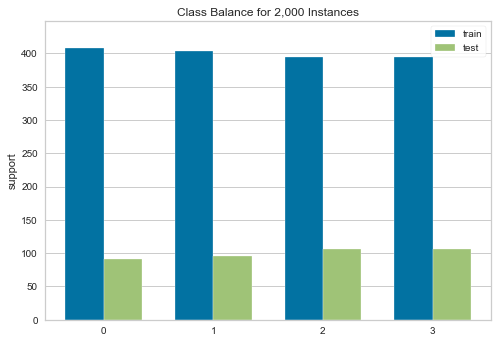

In [61]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

### MACHINE VECTOR(SVM) ALGORITHM

In [62]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))
predicted_sgd = svm.predict(x_test)
def print_metrics(y_test, predicted_value): 
    print("precision_score {}".format(
      precision_score(y_test, predicted_sgd, average='weighted')))
    print("recall_score {}".format(
      recall_score(y_test, predicted_sgd, average='weighted')))
    print("f1_score {}".format(
      f1_score(y_test, predicted_sgd, average='weighted')))
print_metrics(y_test, predicted_sgd)

train accuracy: 0.91
test accuracy: 0.84
precision_score 0.8518424244261849
recall_score 0.84
f1_score 0.8424910714285716


###  Подбор параметров

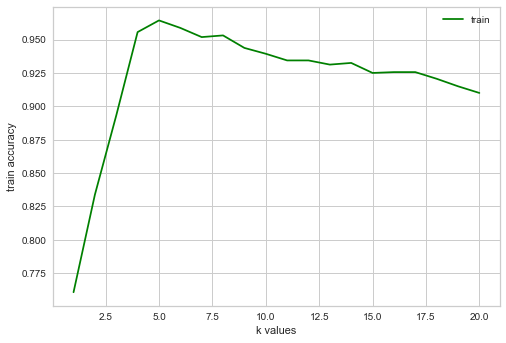

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [64]:
C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.941875
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


### SGDClassifier

In [67]:
sgd = SGDClassifier().fit(x_train, y_train)
print("train accuracy:",sgd.score(x_train,y_train))
print("test accuracy:",sgd.score(x_test,y_test))
predicted_sgd = sgd.predict(x_test)
print_metrics(y_test, predicted_sgd)


train accuracy: 0.780625
test accuracy: 0.72
precision_score 0.7393706611851808
recall_score 0.72
f1_score 0.7224004919114921


### RandomForestClassifier

In [68]:
rfc = RandomForestClassifier().fit(x_train, y_train)
print("train accuracy:",rfc.score(x_train,y_train))
print("test accuracy:",rfc.score(x_test,y_test))
predicted_rfc = rfc.predict(x_test)
print_metrics(y_test, predicted_rfc)


train accuracy: 0.99625
test accuracy: 0.7975
precision_score 0.7393706611851808
recall_score 0.72
f1_score 0.7224004919114921


### DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
print("train accuracy:",dt.score(x_train,y_train))
print("test accuracy:",dt.score(x_test,y_test))
predicted_dt = dt.predict(x_test)
print_metrics(y_test, predicted_dt)


train accuracy: 1.0
test accuracy: 0.8475
precision_score 0.7393706611851808
recall_score 0.72
f1_score 0.7224004919114921


In [70]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

### Подбор гиперпараметров для RandomForestClassifier

In [71]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [72]:
gs_rfc.best_params_

{'n_estimators': 70}

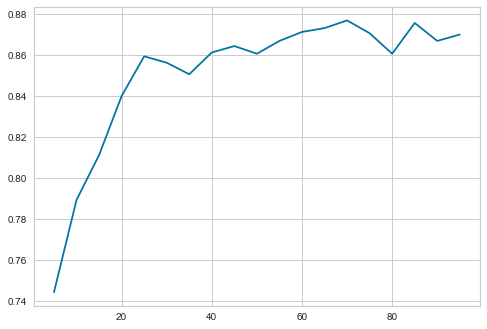

In [73]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

Сравнение моделей после подбора гиперпараметров RandomForestClassifier

In [74]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators']).fit(x_train, y_train)
predicted_rfc_opt = rfc_optimized.predict(x_test)
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test, predicted_rfc_opt)

0.85

In [76]:
(precision_score(y_test, predicted_rfc_opt, average='weighted'), 
 recall_score(y_test, predicted_rfc_opt, average='weighted'))

(0.8519589072943912, 0.85)

In [77]:
f1_score(y_test, predicted_rfc_opt, average='weighted')

0.8506539141485899

### Подбор гиперпараметров для DecisionTreeClassifier

In [78]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [79]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
clf_gs_dt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
clf_gs_dt.best_params_

{'max_depth': 6}

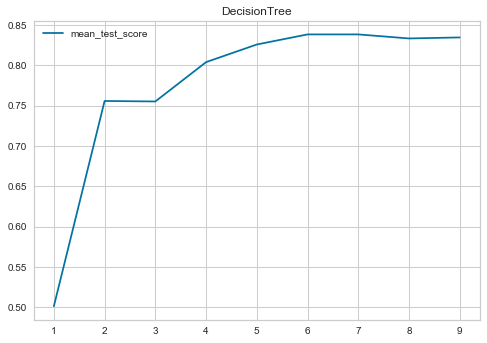

In [81]:
plt.title('DecisionTree')
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

### Сравнение моделей после подбора гиперпараметров для DecisionTreeClassifier

In [82]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(x_train, y_train)
predicted_dt_opt = dt_optimized.predict(x_test)

In [83]:
accuracy_score(y_test, predicted_dt_opt)

0.8325

In [84]:
(precision_score(y_test, predicted_dt_opt, average='weighted'), 
 recall_score(y_test, predicted_dt_opt, average='weighted'))

(0.8345582691806205, 0.8325)

In [85]:
f1_score(y_test, predicted_dt_opt, average='weighted')

0.8332787962972419

### Подбор гиперпараметров для SGDClassifier

In [86]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

In [87]:
clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
clf_gs_sgd.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
clf_gs_sgd.best_params_

{'l1_ratio': 0.2}

In [89]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

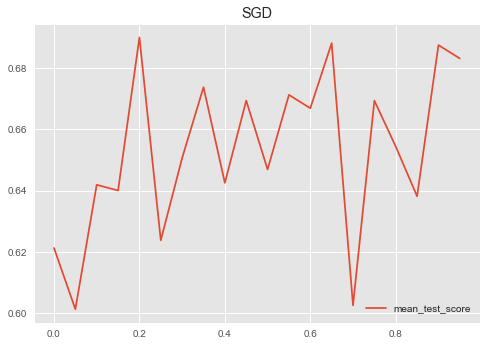

In [90]:
plt.title('SGD')
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

### Сравнение моделей после подбора гиперпараметров для SGDClassifier

In [91]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(x_train, y_train)
predicted_sgd_opt = sgd_optimized.predict(x_test)

In [92]:
accuracy_score(y_test, predicted_sgd_opt)

0.6725

In [93]:
(precision_score(y_test, predicted_sgd_opt, average='weighted'), 
 recall_score(y_test, predicted_sgd_opt, average='weighted'))

(0.7402628230294913, 0.6725)

In [94]:
f1_score(y_test, predicted_sgd_opt, average='weighted')

0.6043446895783344

### Вывод: 
наибольшую точность показала машина опорных векторов при изначальном исследовании и после подбора гиперпараметров. 
Остальные модели показали приемлемые результаты, но ниже примерно на 10 процентов в большинстве случаев. 
1. SVG: f1 - 94
2. SGD: f1 - 66.8
3. RAndom Forest: f1 - 85.5
4. Decision Tree: f1 - 84

Таким образом, лучше всего подходит машина опорных векторов и случайный лес. 
При подборе гиперпараметров все модели показали прирост точности.